In [1]:
import os
from konlpy.tag import Okt

# JAVA_HOME 경로를 직접 설정
os.environ['JAVA_HOME'] = r'C:\Program Files\Java\jdk-23'
os.environ['PATH'] = os.environ['JAVA_HOME'] + r'\bin;' + os.environ['PATH']

# Konlpy 테스트
okt = Okt()
print(okt.morphs("자바 경로 설정이 완료되었습니다."))

['자바', '경로', '설정', '이', '완료', '되었습니다', '.']


In [3]:
##########################
## 라이브러리 및 설정 준비
##########################
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

# 형태소 분석기와 불용어 리스트 설정
okt = Okt()
stopwords = set(['의', '이', '가', '은', '를', '에', '과', '하다', '있다', '되다', '것', '입니다'])

# 데이터 폴더 경로 설정
folder_path = r"C:\Users\Admin\Desktop\삼정\1차_프로젝트\newsdata_csv"  # CSV 파일이 저장된 폴더 경로
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]


In [4]:
##########################
## CSV 파일 읽기
##########################
# 모든 CSV 파일 로드
dataframes = []
for file in file_list:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append((file, df))


In [5]:
##########################
## 텍스트 전처리
##########################
def preprocess_text_korean(text):
    """
    한국어 텍스트를 형태소 분석 후 불용어 제거하여 처리합니다.
    """
    # 형태소 분석 후 명사 추출
    tokens = okt.nouns(text)
    # 불용어 제거
    tokens = [word for word in tokens if word not in stopwords and len(word) > 1]
    return ' '.join(tokens)


In [6]:
##########################
## tf-idf 키워드 추출
##########################
# 결과 저장 리스트
results = []

for file, df in dataframes:
    # 'information' 열 확인
    if 'information' not in df.columns:
        print(f"Warning: 'information' 열이 {file}에 없습니다. 건너뜁니다.")
        continue
    
    # 텍스트 전처리
    texts = df['information'].dropna().tolist()
    preprocessed_texts = [preprocess_text_korean(text) for text in texts]
    
    # TF-IDF 벡터화
    vectorizer = TfidfVectorizer(max_features=20)  # 상위 20개 키워드 추출
    tfidf_matrix = vectorizer.fit_transform(preprocessed_texts)
    keywords = vectorizer.get_feature_names_out()
    
    # 결과 저장
    results.append({
        "file": file,
        "keywords": ', '.join(keywords)  # 키워드를 문자열로 연결
    })


In [7]:
# 결과를 데이터프레임으로 변환 및 저장
output_df = pd.DataFrame(results)

# CSV 저장 시 encoding='utf-8-sig' 추가
output_df.to_csv('./tfidf_keywords_korean.csv', index=False, encoding='utf-8-sig')

print("키워드 추출 완료! 결과는 tfidf_keywords_korean.csv에 저장되었습니다.")


키워드 추출 완료! 결과는 tfidf_keywords_korean.csv에 저장되었습니다.


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. 데이터 로드
file_path = './tfidf_keywords_korean.csv'  # 파일 경로를 지정하세요
data = pd.read_csv(file_path)

# 2. 모든 키워드를 하나의 텍스트 데이터로 결합
all_keywords = ' '.join(data['keywords'])

# 3. TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=20)  # 상위 20개 키워드 추출
tfidf_matrix = vectorizer.fit_transform([all_keywords])
keywords = vectorizer.get_feature_names_out()

# 4. 키워드와 점수를 데이터프레임으로 변환
overall_keywords = pd.DataFrame({
    'Keyword': keywords,
    'Score': tfidf_matrix.toarray()[0]
})

# 5. 점수 순으로 정렬
overall_keywords = overall_keywords.sort_values(by='Score', ascending=False)

# 6. 결과 저장
output_path = './overall_tfidf_keywords.csv'
overall_keywords.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"키워드 추출 완료! 결과는 '{output_path}'에 저장되었습니다.")


키워드 추출 완료! 결과는 './overall_tfidf_keywords.csv'에 저장되었습니다.


In [10]:
import pandas as pd

# TF-IDF 키워드와 점수 (예제)
keywords = ["금융", "은행", "대출", "보험", "금리"]
scores = [0.340917, 0.33904968, 0.31383111, 0.30449090, 0.29982080]

# 데이터프레임 생성
keywords_table = pd.DataFrame({
    'Keyword': keywords,
    'Score': scores
})

# 정렬 (이미 정렬되어 있지만 다시 수행 가능)
keywords_table = keywords_table.sort_values(by='Score', ascending=False).reset_index(drop=True)

# 출력
print(keywords_table)

# (선택) 결과 저장
output_path = './full_keywords_table.csv'
keywords_table.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"결과가 '{output_path}'에 저장되었습니다.")


  Keyword     Score
0      금융  0.340917
1      은행  0.339050
2      대출  0.313831
3      보험  0.304491
4      금리  0.299821
결과가 './full_keywords_table.csv'에 저장되었습니다.


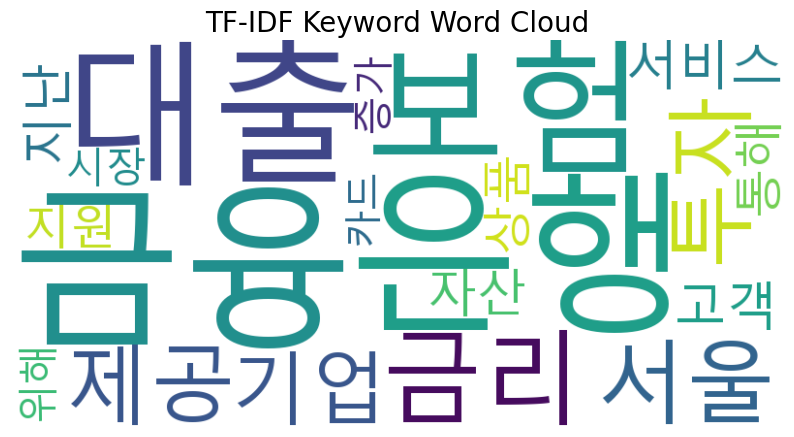

In [11]:
##########################
## 워드클라우드 생성
##########################
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 데이터 로드
file_path = './overall_tfidf_keywords.csv'  # TF-IDF 결과 파일 경로
overall_keywords = pd.read_csv(file_path)

# 키워드와 점수 데이터를 워드클라우드 입력 형식으로 변환
wordcloud_data = {row['Keyword']: row['Score'] for _, row in overall_keywords.iterrows()}

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path=r'C:\Users\Admin\malgun.ttf',  # 한글 폰트 경로
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(wordcloud_data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("TF-IDF Keyword Word Cloud", fontsize=20)
plt.show()


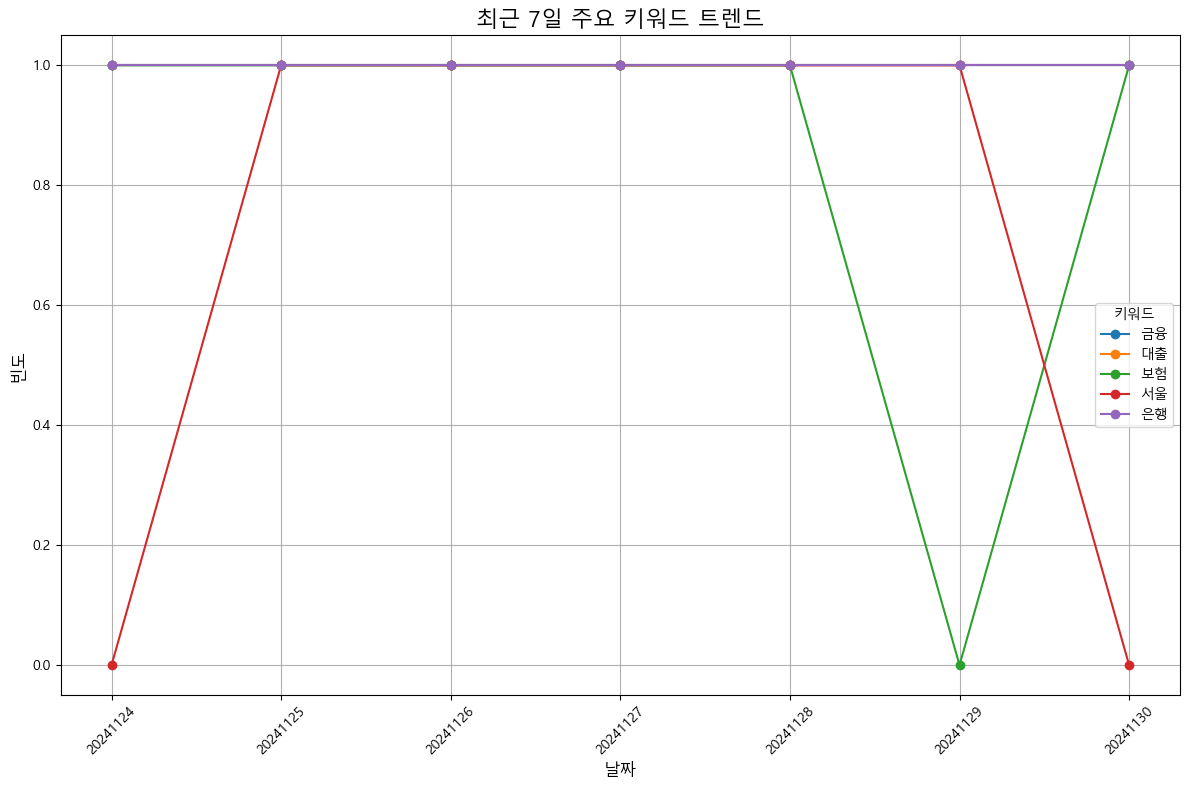

In [12]:
#########################
## 일자별 키워드로 라인 차트 생성 > 차트 끊김 문제 발생
#########################
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

# Matplotlib 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows: Malgun Gothic, Mac: AppleGothic

# CSV 파일 로드
file_path = r'C:\Users\Admin\Desktop\삼정\1차_프로젝트\tfidf_keywords_korean.csv'
data = pd.read_csv(file_path)

# 1. 날짜 추출
data['date'] = data['file'].str.extract(r'(\d{8})')

# 2. 키워드 열 분리
data['keywords'] = data['keywords'].str.split(', ')

# 3. 날짜별 키워드 빈도 계산
trend_data = []
for _, row in data.iterrows():
    date = row['date']
    keywords = row['keywords']
    for keyword in keywords:
        trend_data.append({'date': date, 'keyword': keyword})

trend_df = pd.DataFrame(trend_data)

# 4. 키워드 빈도 계산
keyword_trend = trend_df.groupby(['date', 'keyword']).size().reset_index(name='count')

# 5. 상위 키워드 추출 (최근 7일 기준)
recent_dates = trend_df['date'].sort_values(ascending=False).unique()[:7]
recent_trend = keyword_trend[keyword_trend['date'].isin(recent_dates)]

# 키워드별 빈도 합산
recent_top_keywords = recent_trend.groupby('keyword')['count'].sum().reset_index()
recent_top_keywords = recent_top_keywords.sort_values(by='count', ascending=False).head(5)

# 6. 상위 키워드의 날짜별 트렌드 데이터 추출
top_keywords = recent_top_keywords['keyword'].tolist()
top_keywords_trend = recent_trend[recent_trend['keyword'].isin(top_keywords)]

# 피벗 테이블로 변환 (날짜를 x축, 키워드를 개별 라인으로)
pivot_data = top_keywords_trend.pivot(index='date', columns='keyword', values='count').fillna(0)

# 7. 라인 차트 시각화
plt.figure(figsize=(12, 8))
for keyword in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[keyword], marker='o', label=keyword)

plt.title('최근 7일 주요 키워드 트렌드', fontsize=16)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.legend(title='키워드', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


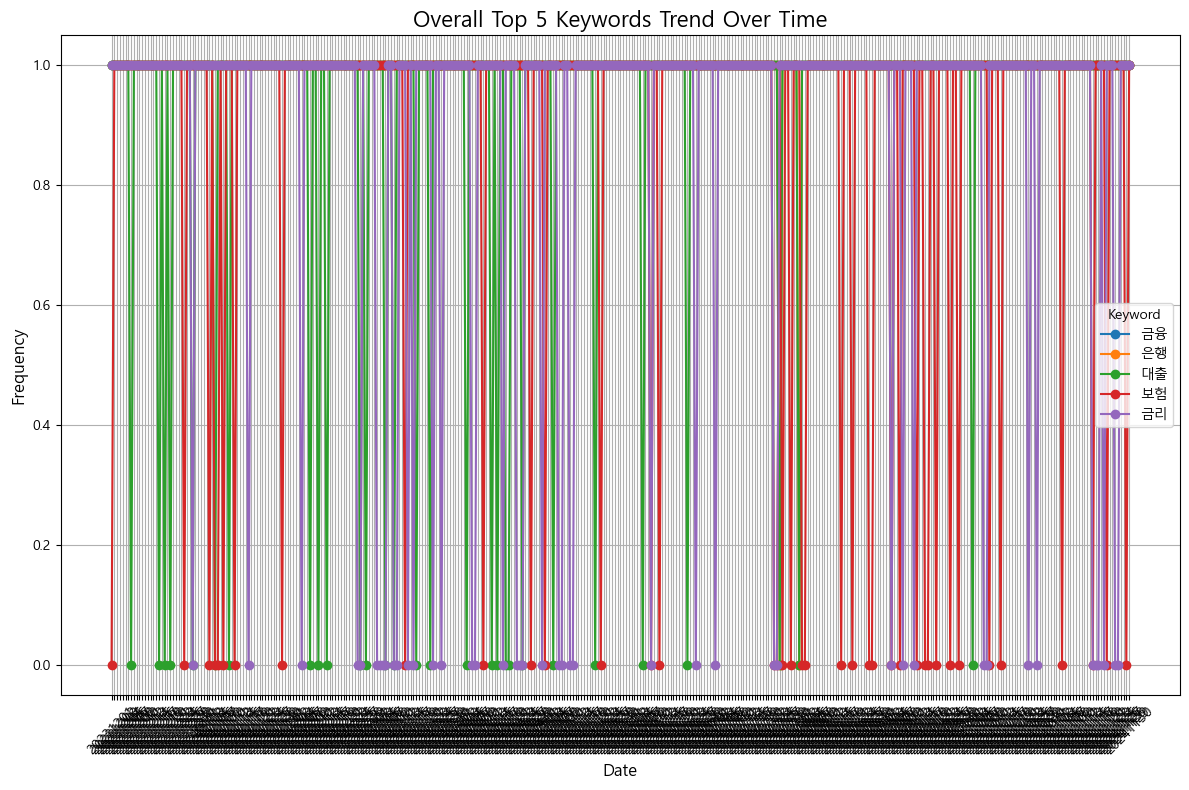

In [13]:
#########################
## 특정 기간 동안 자주 등장하는 전체 상위 키워드를 먼저 선정한 뒤, 해당 키워드의 날짜별 빈도를 차트를 그리는 방식)
#########################
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows: Malgun Gothic, Mac: AppleGothic

# CSV 파일 로드
file_path = r'C:\Users\Admin\Desktop\삼정\1차_프로젝트\tfidf_keywords_korean.csv'
data = pd.read_csv(file_path)

# 1. 날짜 추출
data['date'] = data['file'].str.extract(r'(\d{8})')

# 2. 키워드 열 분리
data['keywords'] = data['keywords'].str.split(', ')

# 3. 날짜별 키워드 빈도 계산
trend_data = []
for _, row in data.iterrows():
    date = row['date']
    keywords = row['keywords']
    for keyword in keywords:
        trend_data.append({'date': date, 'keyword': keyword})

trend_df = pd.DataFrame(trend_data)

# 4. 전체 상위 5개 키워드 선정
overall_top_keywords = trend_df['keyword'].value_counts().head(5).index.tolist()

# 5. 상위 5개 키워드의 날짜별 빈도 계산
top_keywords_trend = trend_df[trend_df['keyword'].isin(overall_top_keywords)]
pivot_data = top_keywords_trend.pivot_table(
    index='date', columns='keyword', values='keyword', aggfunc='size', fill_value=0
)

# 6. 라인 차트 시각화
plt.figure(figsize=(12, 8))
for keyword in overall_top_keywords:
    plt.plot(pivot_data.index, pivot_data[keyword], marker='o', label=keyword)

plt.title('Overall Top 5 Keywords Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Keyword', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


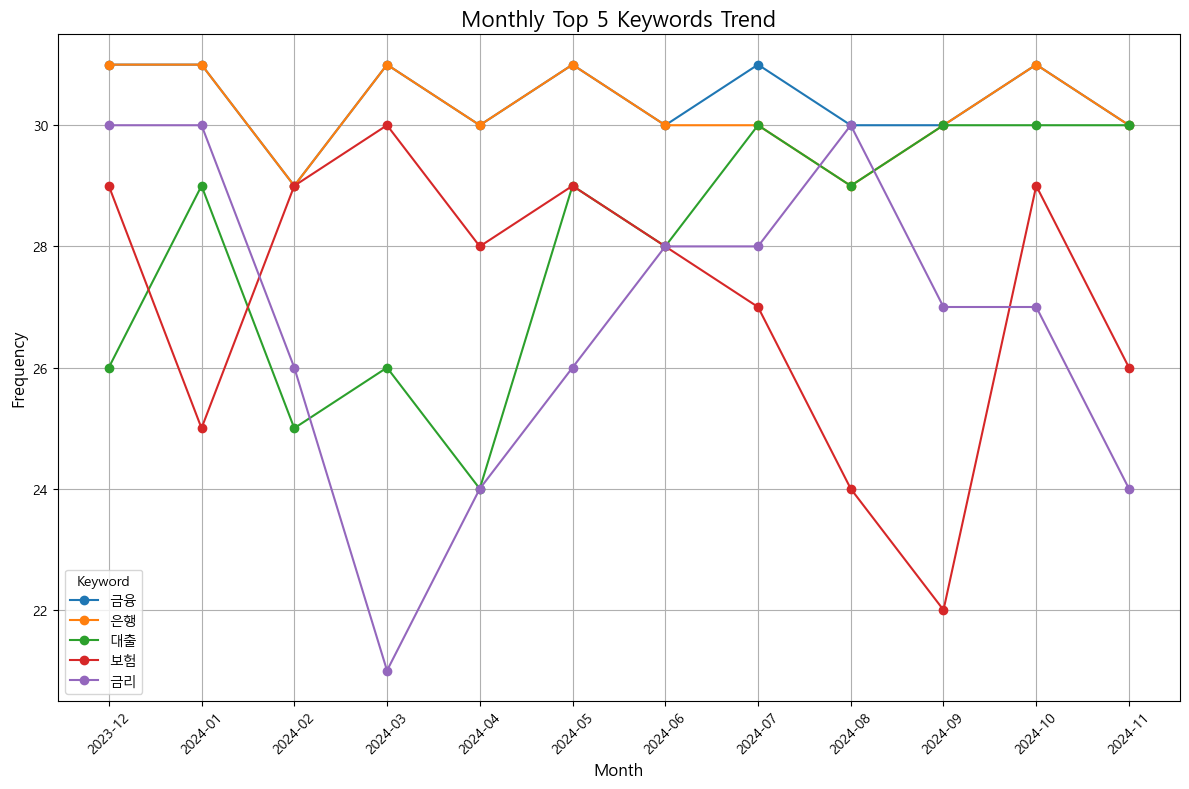

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows: Malgun Gothic, Mac: AppleGothic

# CSV 파일 로드
file_path = r'C:\Users\Admin\Desktop\삼정\1차_프로젝트\tfidf_keywords_korean.csv'
data = pd.read_csv(file_path)

# 1. 날짜 추출 및 월 단위로 변환
data['date'] = data['file'].str.extract(r'(\d{8})')
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
data['month'] = data['date'].dt.to_period('M')  # 월 단위로 변환

# 2. 키워드 열 분리
data['keywords'] = data['keywords'].str.split(', ')

# 3. 월별 키워드 빈도 계산
trend_data = []
for _, row in data.iterrows():
    month = row['month']
    keywords = row['keywords']
    for keyword in keywords:
        trend_data.append({'month': month, 'keyword': keyword})

trend_df = pd.DataFrame(trend_data)

# 4. 전체 상위 5개 키워드 선정
overall_top_keywords = trend_df['keyword'].value_counts().head(5).index.tolist()

# 5. 상위 5개 키워드의 월별 빈도 계산
top_keywords_trend = trend_df[trend_df['keyword'].isin(overall_top_keywords)]
pivot_data = top_keywords_trend.pivot_table(
    index='month', columns='keyword', values='keyword', aggfunc='size', fill_value=0
)

# 6. 라인 차트 시각화
plt.figure(figsize=(12, 8))
for keyword in overall_top_keywords:
    plt.plot(pivot_data.index.astype(str), pivot_data[keyword], marker='o', label=keyword)

plt.title('Monthly Top 5 Keywords Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Keyword', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 설정
try:
    plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows: Malgun Gothic, Mac: AppleGothic
except Exception:
    print("한글 폰트 설정 실패. 시스템에 한글 폰트를 설치하거나 경로를 확인하세요.")

# CSV 파일 경로 입력
file_path = input("키워드가 포함된 CSV 파일 경로를 입력하세요: ")

# CSV 파일 로드
try:
    data = pd.read_csv(file_path)
except Exception as e:
    print(f"CSV 파일을 불러오는 중 오류가 발생했습니다: {e}")
    exit()

# 열 이름 확인
print("데이터프레임의 열 이름:", data.columns)

# 1. 날짜 추출
try:
    data['date'] = data['file'].str.extract(r'(\d{8})')  # 파일 이름에서 날짜 추출
except Exception:
    print("날짜 추출 실패. 파일 이름에서 날짜 패턴을 확인하세요.")
    exit()

# 2. 키워드 열 분리
# 키워드 열 이름 확인 후 수정 (예: 'keywords' 대신 실제 열 이름 사용)
try:
    data['keywords'] = data['keywords'].str.split(', ')  # 열 이름을 실제 키워드 열 이름으로 변경
except KeyError:
    print("키워드 열('keywords')을 찾을 수 없습니다. 열 이름을 확인하세요.")
    exit()

# 3. 날짜별 키워드 빈도 계산
trend_data = []
for _, row in data.iterrows():
    date = row['date']
    keywords = row['keywords']
    for keyword in keywords:
        trend_data.append({'date': date, 'keyword': keyword})

trend_df = pd.DataFrame(trend_data)

# 4. 전체 상위 5개 키워드 선정
overall_top_keywords = trend_df['keyword'].value_counts().head(5).index.tolist()

# 5. 상위 5개 키워드의 날짜별 빈도 계산
top_keywords_trend = trend_df[trend_df['keyword'].isin(overall_top_keywords)]
pivot_data = top_keywords_trend.pivot_table(
    index='date', columns='keyword', values='keyword', aggfunc='size', fill_value=0
)

# 6. 라인 차트 시각화
plt.figure(figsize=(12, 8))
for keyword in overall_top_keywords:
    plt.plot(pivot_data.index, pivot_data[keyword], marker='o', label=keyword)

plt.title('전체 상위 5개 키워드의 날짜별 트렌드', fontsize=16)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.legend(title='키워드', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


CSV 파일을 불러오는 중 오류가 발생했습니다: [Errno 2] No such file or directory: 'escape'
데이터프레임의 열 이름: Index(['file', 'keywords', 'date', 'month'], dtype='object')


TypeError: 'float' object is not iterable

: 